In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [3]:
df = pd.read_csv("UkElectricity_2023.csv")
df['datetime'] = pd.to_datetime(df['datetime'])
df.set_index('datetime', inplace=True)

In [4]:
class CustomGradientBoostingRegressor:
    def __init__(self, n_estimators=100, learning_rate=0.1, max_depth=1):
        self.n_estimators = n_estimators
        self.learning_rate = learning_rate
        self.max_depth = max_depth
        self.models = []
        self.gammas = []

    def fit(self, X, y):
        self.models = []
        self.gammas = []
        y_pred = np.full_like(y, np.mean(y), dtype=np.float64)
        self.init_pred = np.mean(y)

        for _ in range(self.n_estimators):
            residual = y - y_pred
            coef = np.sum(residual * X[:, 0]) / np.sum(X[:, 0] ** 2)  # simple stump
            self.models.append(coef)
            y_pred += self.learning_rate * coef * X[:, 0]
            self.gammas.append(coef)

    def predict(self, X):
        y_pred = np.full(X.shape[0], self.init_pred)
        for coef in self.models:
            y_pred += self.learning_rate * coef * X[:, 0]
        return y_pred


In [5]:
df['lag1'] = df['Price'].shift(1)
df.dropna(inplace=True)

X = df[['lag1']].values
y = df['Price'].values

In [6]:
split = int(len(X) * 0.8)
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

In [7]:
model = CustomGradientBoostingRegressor(n_estimators=50, learning_rate=0.1)
model.fit(X_train, y_train)
predictions = model.predict(X_test)

In [8]:
mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

Mean Absolute Error (MAE): 17.67
Mean Squared Error (MSE): 381.34
Root Mean Squared Error (RMSE): 19.53


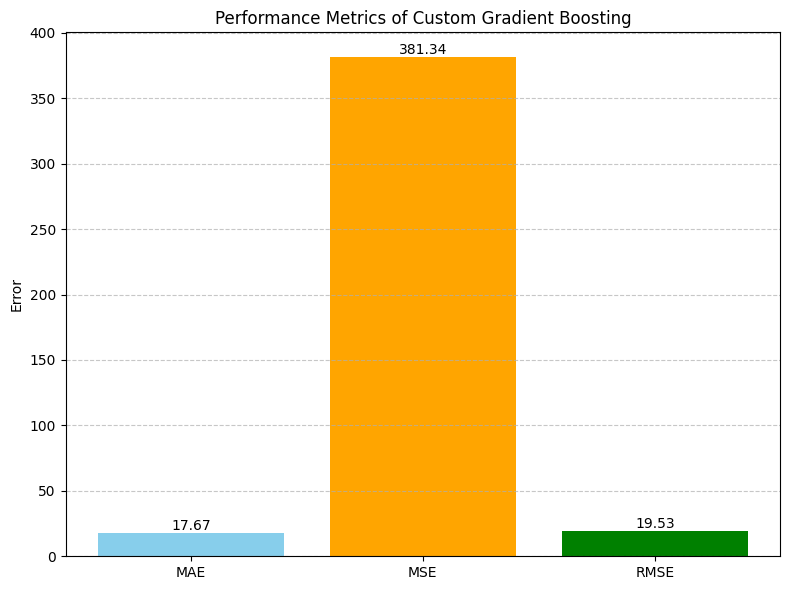

In [9]:
metrics = ['MAE', 'MSE', 'RMSE']
values = [mae, mse, rmse]

plt.figure(figsize=(8, 6))
bars = plt.bar(metrics, values, color=['skyblue', 'orange', 'green'])
plt.title('Performance Metrics of Custom Gradient Boosting')
plt.ylabel('Error')
plt.grid(axis='y', linestyle='--', alpha=0.7)

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 0.01, f'{yval:.2f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

